## I. Load Data and Objectives

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Load data
df = pd.read_excel("./Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [2]:
import folium

In [3]:
center=[df["X5 latitude"].mean(),df["X6 longitude"].mean()]

In [4]:
map=folium.Map(location=center,zoom_start=13)
for i, j in df.iterrows():
    location=[j['X5 latitude'],j['X6 longitude']]
    folium.Marker(location=location).add_to(map)
map

Concert map to .png

In [5]:
from PIL import Image
from io import BytesIO
png_img = map._to_png()

# Convert the base64 encoded PNG image to a PIL Image
image = Image.open(BytesIO(png_img))

# Save the PIL image as a PNG file
image.save("map.png")

# II. Dataset Description and Transformation

In [6]:
df.shape

(414, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Column "No" is index; thus, drop it for the default index

In [8]:
df.drop(columns=["No"], inplace=True)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Transform the column transaction date into datatime

Our hypothesis is 2013.500 is June/2013

In [9]:
# year = years.astype(int)
# month = np.floor((years - year) * 12).astype(int)
# return pd.to_datetime(year.astype(str)) + pd.to_timedelta(month, unit='M')

In [10]:
def convert_to_datetime(years):
    year = int(years)
    month = np.rint((years - year) * 12-1)
    base_date = pd.to_datetime(f"{year}")
    return base_date + pd.DateOffset(months=month)

df["X1 transaction date"] = df["X1 transaction date"].apply(convert_to_datetime).dt.to_period('M')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-11,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-07,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-06,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2012-12,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-03,18.8,390.96960,7,24.97923,121.53986,40.6
412,2012-12,8.1,104.81010,5,24.96674,121.54067,52.5


Check whether the formula is correct

Row 413's X1 is 2013.05 and after the transformation it is 2013-06-01

Thus, it is correct

# III. Data Preprocessing

## 3.1 Dealing with Missing Values

In [11]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## 3.2 Dealing with duplicated rows

In [12]:
df.duplicated().sum()

0

## 3.3 Dealing with outliers

Boxplot is used for visualizing the spread, skewness, and outliers within the data.

And Capping method with IQR is used for dealing with outliers.

### 3.3.1 Boxplot visualization

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\498750044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\498750044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\498750044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\498750044.py:6: FutureWarning: 

Passing `palette` without assignin

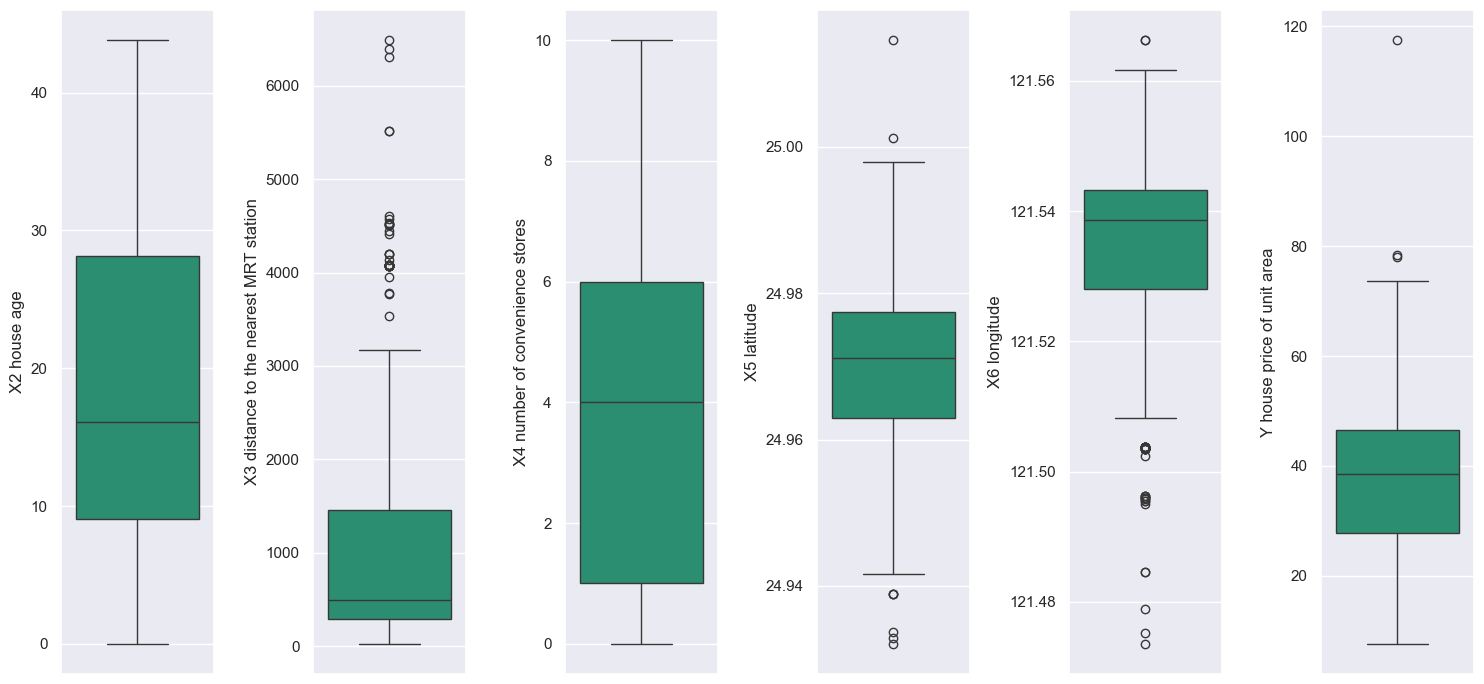

In [13]:
numerical_columns = df.select_dtypes(include="number").columns.tolist()
plt.figure(figsize=(15, 7))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(data=df[column], palette="Dark2")

plt.tight_layout()
plt.show()

### 3.3.2 Dealing with outliers

In [14]:
df_capped = df.copy()

In [15]:
for column in df_capped.select_dtypes(include="number").columns.tolist():
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + (1.5 * IQR)
    min_limit = Q1 - (1.5 * IQR)
    df_capped[column] = pd.DataFrame(
        np.where(
            df_capped[column] > max_limit,
            max_limit,
            (np.where(df_capped[column] < min_limit, min_limit, df_capped[column])),
        ),
        columns=[column],
    )

### 3.3.3 Boxplot visualization after capping 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\1454139934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\1454139934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\1454139934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2476\1454139934.py:5: FutureWarning: 

Passing `

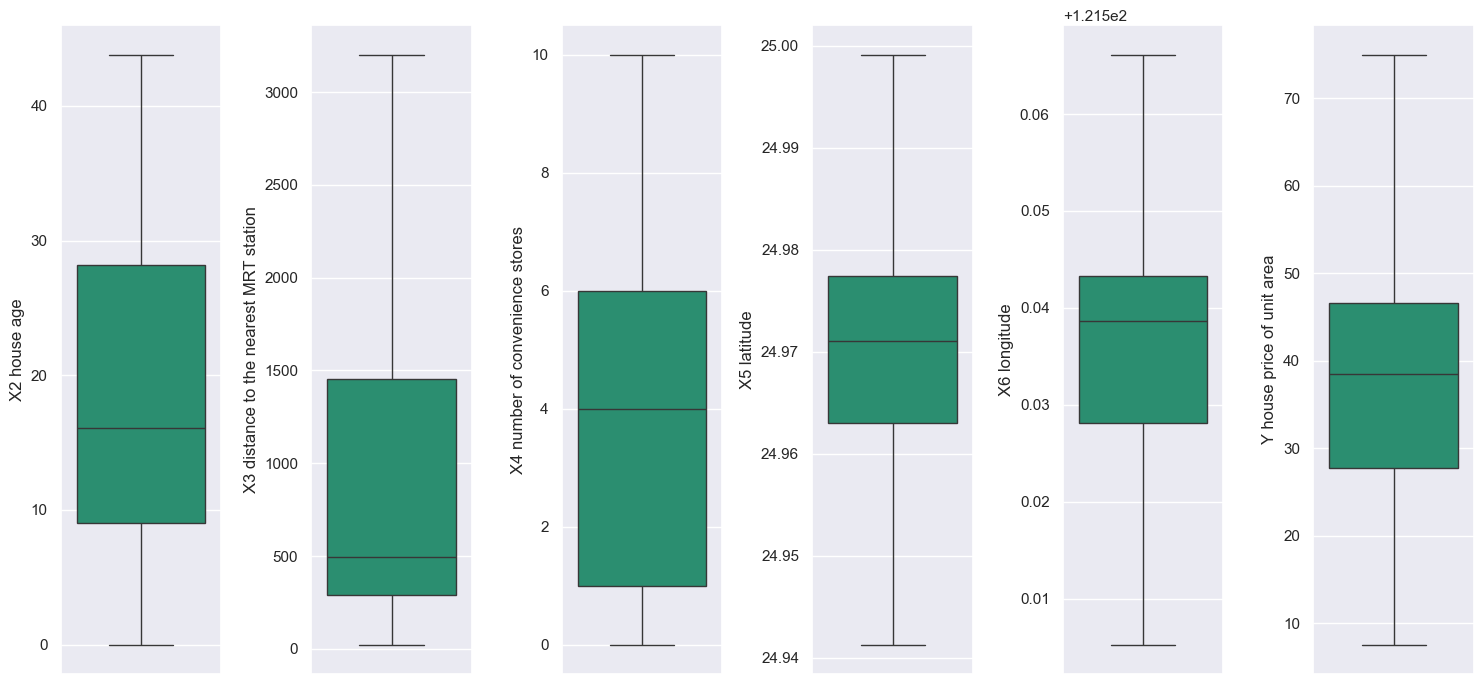

In [16]:
plt.figure(figsize=(15, 7))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(data=df_capped[column], palette="Dark2")

plt.tight_layout()  #prevent overlap
plt.show()

# IV. Exploratory Data Analysis and Data visualization

## 4.1 Univariate Graphical Analysis

In [17]:
df_capped.describe().T

,count,mean,std,min,25%,50%,75%,max
X2 house age,414.0,17.712560,11.392485,0.000000,9.025000,16.10000,28.150000,43.800000
X3 distance to the nearest MRT station,414.0,974.545851,968.915855,23.382840,289.324800,492.23130,1454.279000,3201.710300
X4 number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.00000,6.000000,10.000000
X5 latitude,414.0,24.969067,0.012080,24.941318,24.963000,24.97110,24.977455,24.999137
X6 longitude,414.0,121.533974,0.013779,121.505255,121.528085,121.53863,121.543305,121.566135
Y house price of unit area,414.0,37.861957,13.112035,7.600000,27.700000,38.45000,46.600000,74.950000


Average House Price of unit area: 37.86

Cheapest House Price of unit area: 7.6

Largest House Price of unit area: 27.7

## 4.2 Univariate Graphical Analysis

Since all of the input features are all numerical, we use histogram to gain insights into the distribution and characteristics of the data.

In [18]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype    
---  ------                                  --------------  -----    
 0   X1 transaction date                     414 non-null    period[M]
 1   X2 house age                            414 non-null    float64  
 2   X3 distance to the nearest MRT station  414 non-null    float64  
 3   X4 number of convenience stores         414 non-null    float64  
 4   X5 latitude                             414 non-null    float64  
 5   X6 longitude                            414 non-null    float64  
 6   Y house price of unit area              414 non-null    float64  
dtypes: float64(6), period[M](1)
memory usage: 22.8 KB


### 4.2.1 Histogram

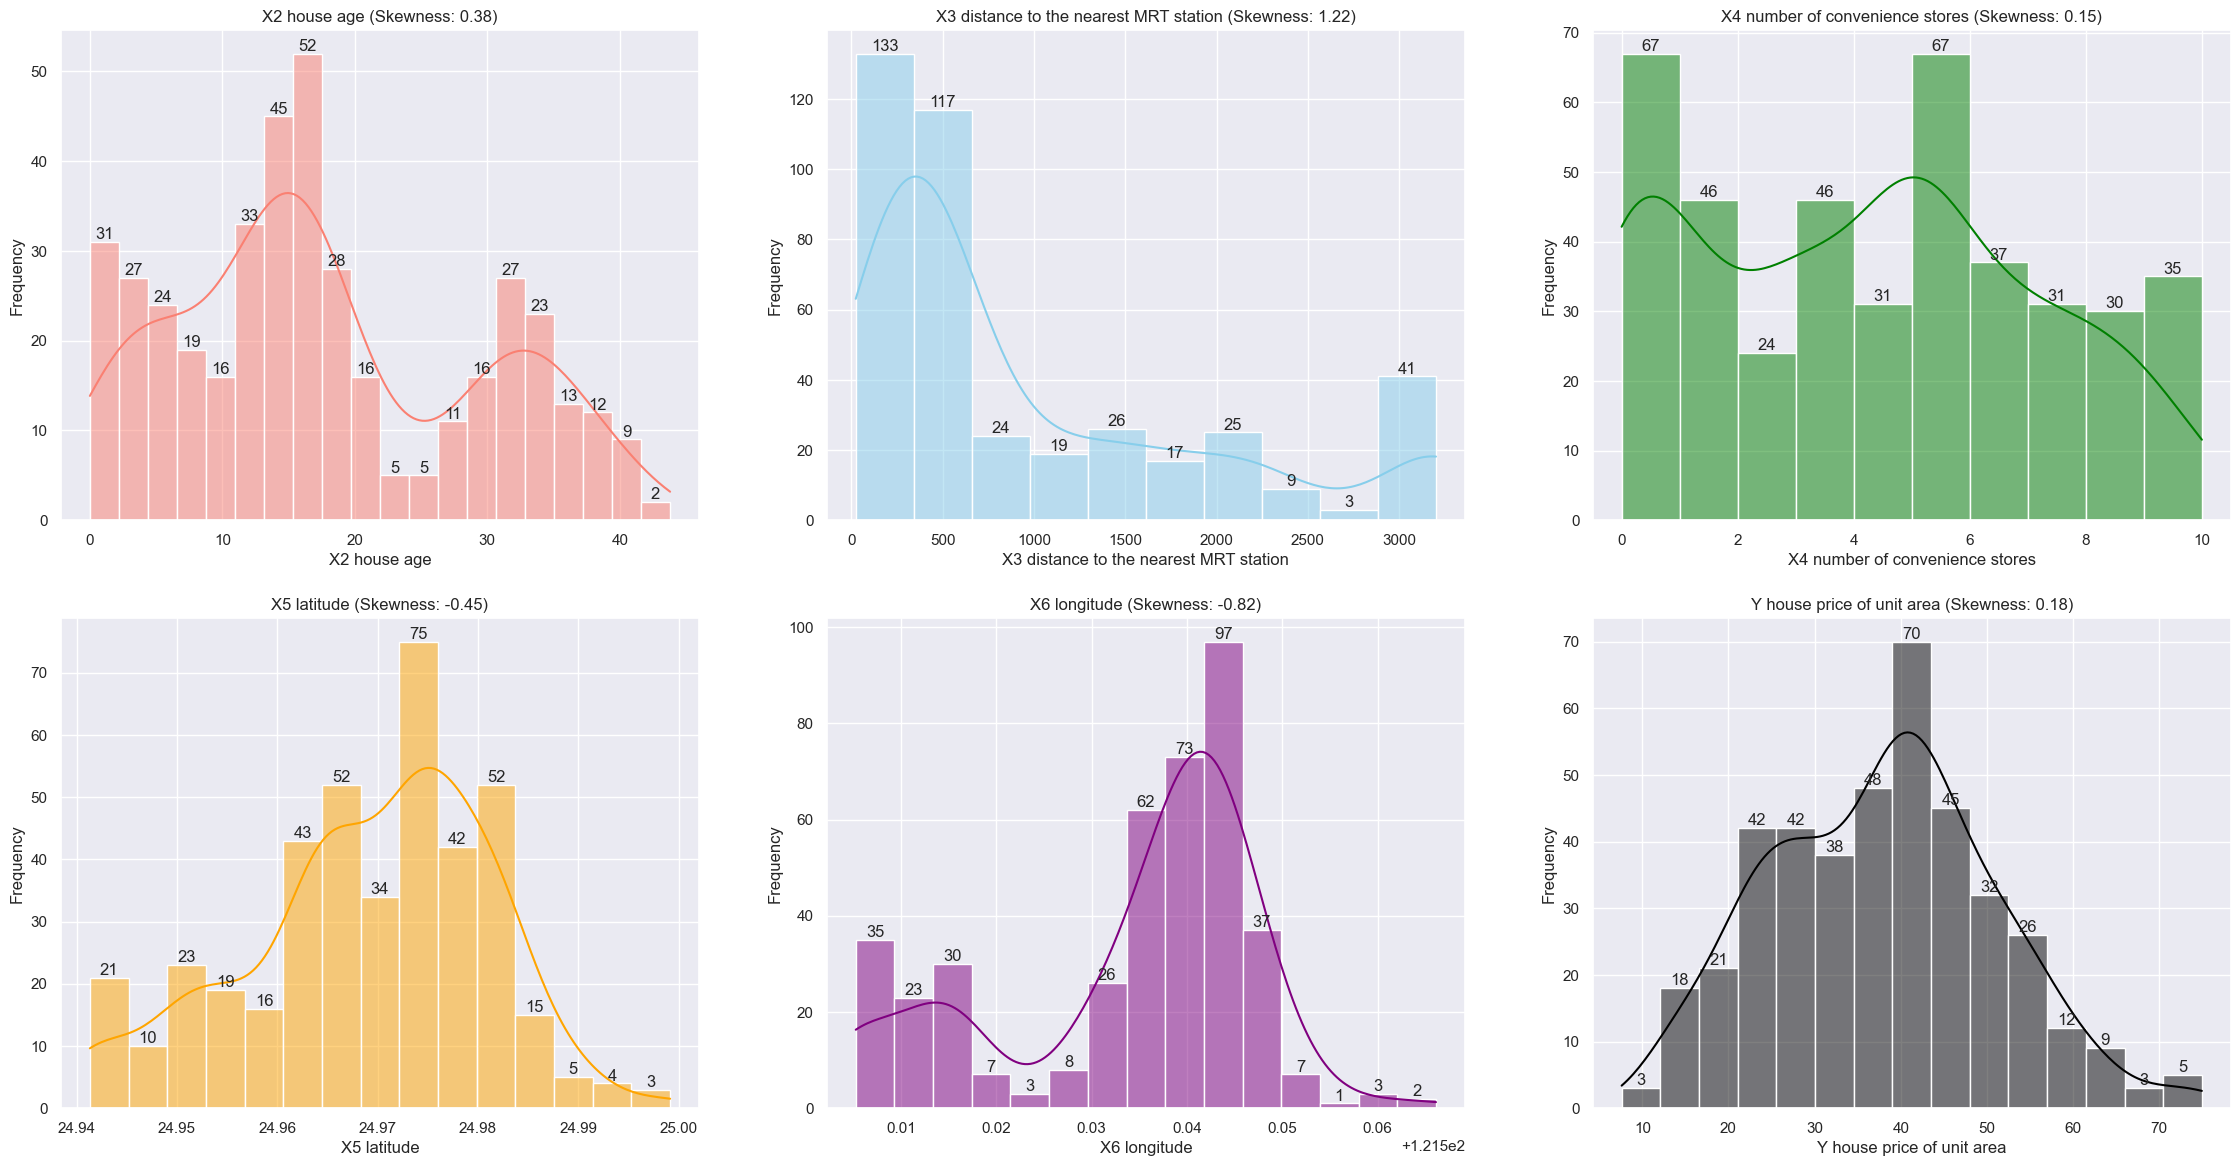

In [19]:
plt.figure(figsize=(28, 14))
hist_colors = ["salmon", "skyblue", "green", "orange", "purple", "black", "blue"]
bins=[20,10,10,15,15,15]

num_plots = len(numerical_columns)
num_rows = 2
num_cols = (num_plots + num_rows - 1) // num_rows

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df_capped[column], kde=True, color=hist_colors[i], bins=bins[i])
    skewness = df_capped[column].skew()
    plt.title(f"{column} (Skewness: {skewness:.2f})")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.grid(True)
    heights, _ = np.histogram(df_capped[column], bins=bins[i])
    for bar, height in zip(plt.gca().patches, heights):
        plt.gca().annotate(
            f"{height}",
            (bar.get_x() + bar.get_width() / 2, height),
            ha="center",
            va="bottom",
        )

plt.show()

<Axes: xlabel='count', ylabel='X1 transaction date'>

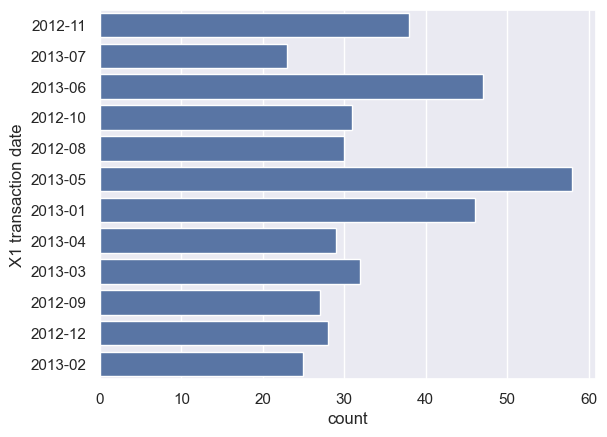

In [20]:
sns.countplot(df_capped["X1 transaction date"])

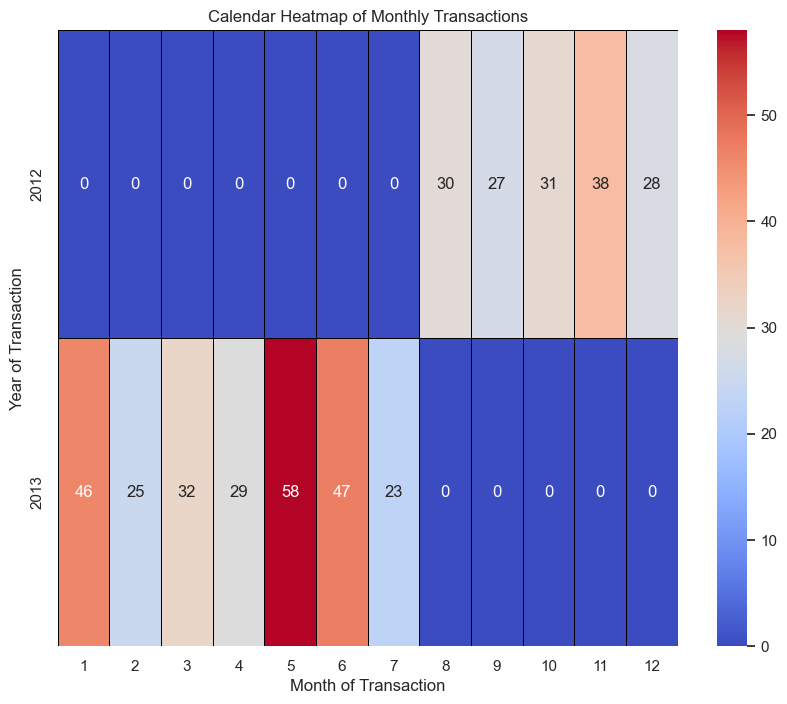

In [21]:
df4vis=pd.DataFrame()
df4vis['Year'] = df_capped['X1 transaction date'].dt.year
df4vis['Month'] = df_capped['X1 transaction date'].dt.month

Cal_heatmap= df4vis.groupby(['Year', 'Month']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(Cal_heatmap,annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=True)

plt.title('Calendar Heatmap of Monthly Transactions')
plt.xlabel('Month of Transaction')
plt.ylabel('Year of Transaction')
plt.show()

## 4.3 Bivariate Analysis

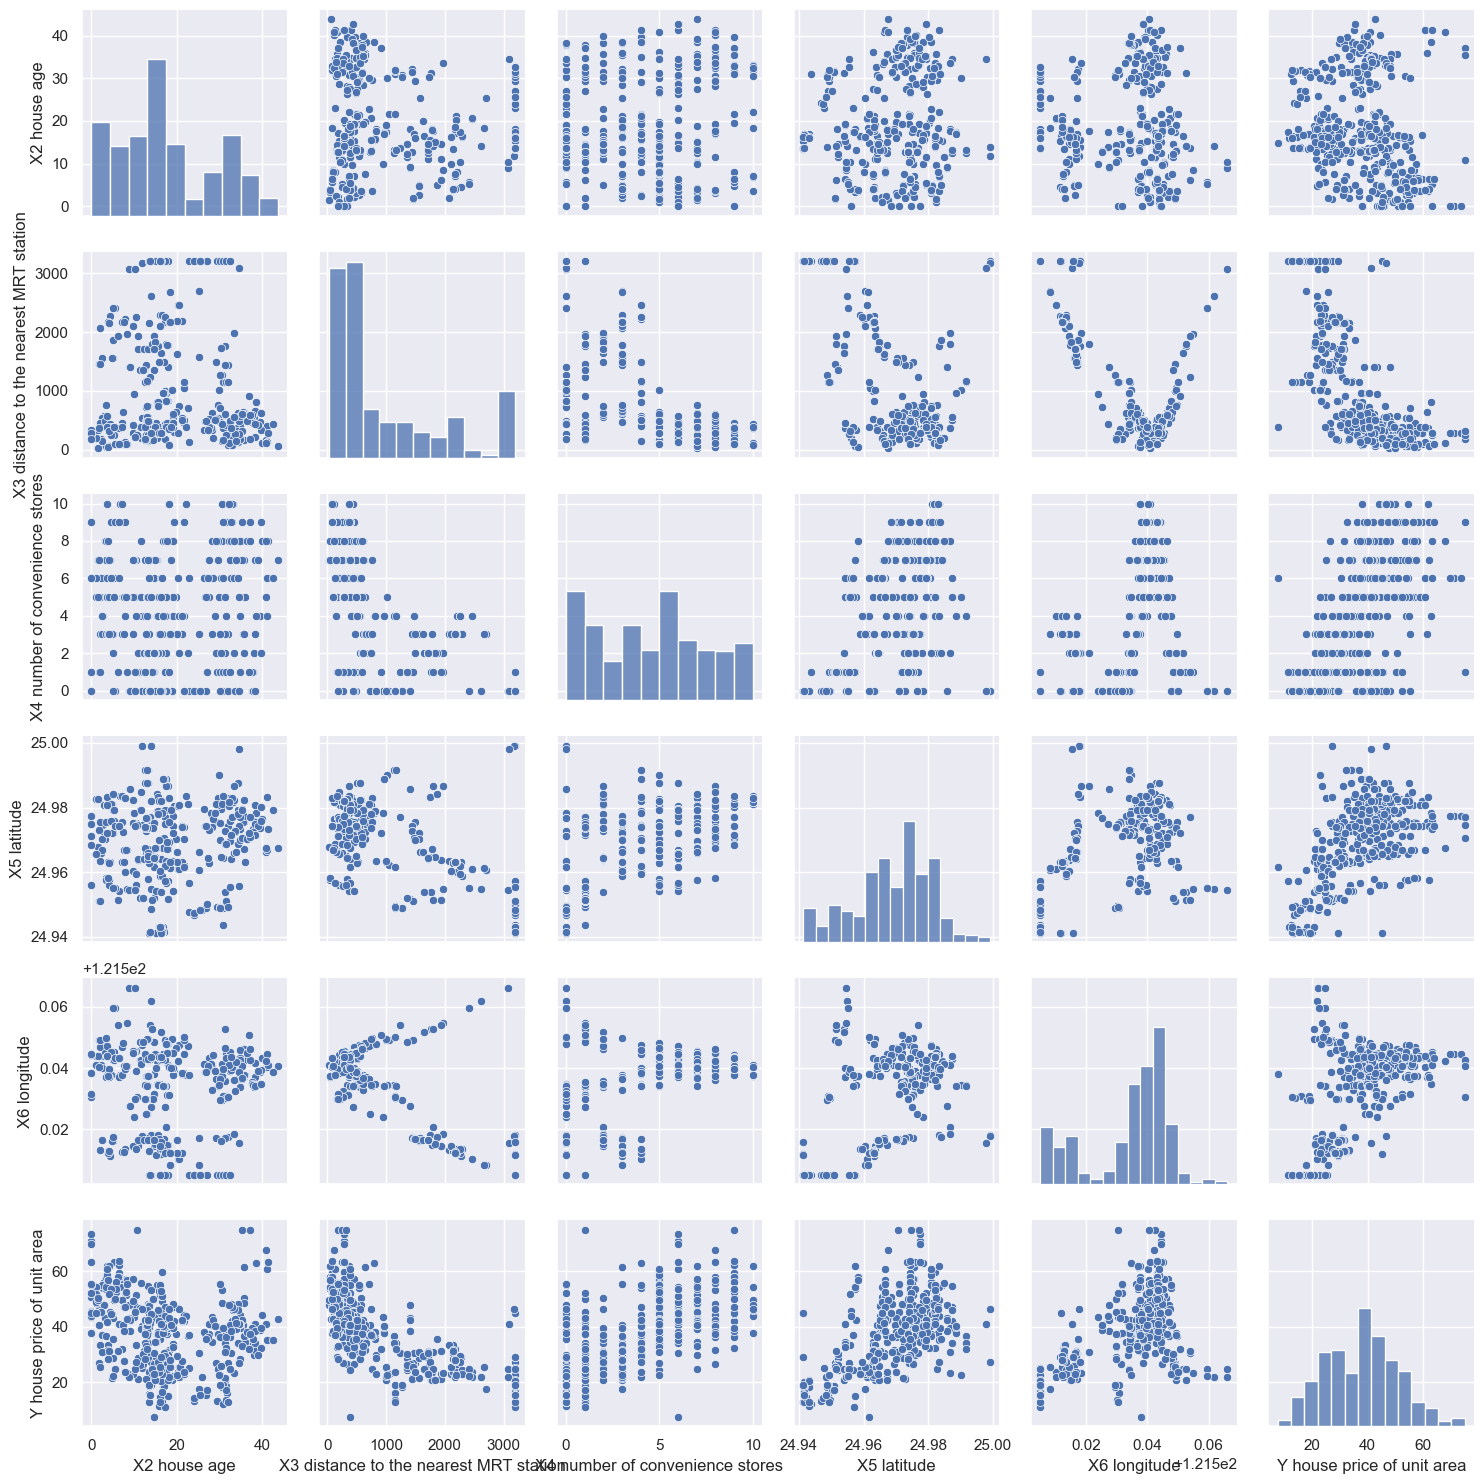

In [22]:
sns.pairplot(df_capped)
plt.tight_layout() 

<Axes: >

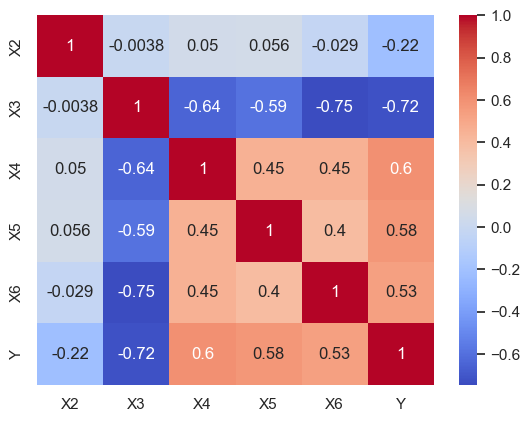

In [23]:
cr = df_capped.corr(numeric_only=True)
sns.heatmap(cr, annot=True, cmap="coolwarm",xticklabels=["X2","X3","X4","X5","X6","Y"],yticklabels=["X2","X3","X4","X5","X6","Y"])

### Map after capped

In [64]:
map_capped=folium.Map(location=[df_capped["X5 latitude"].mean(),df_capped["X6 longitude"].mean()],zoom_start=13)
for i, j in df_capped.iterrows():
    location=[j['X5 latitude'],j['X6 longitude']]
    folium.Marker(location=location).add_to(map_capped)
map_capped

# V. Machine Learning

In [25]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype    
---  ------                                  --------------  -----    
 0   X1 transaction date                     414 non-null    period[M]
 1   X2 house age                            414 non-null    float64  
 2   X3 distance to the nearest MRT station  414 non-null    float64  
 3   X4 number of convenience stores         414 non-null    float64  
 4   X5 latitude                             414 non-null    float64  
 5   X6 longitude                            414 non-null    float64  
 6   Y house price of unit area              414 non-null    float64  
dtypes: float64(6), period[M](1)
memory usage: 22.8 KB


In [26]:
df_capped.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-11,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012-11,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013-07,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013-06,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012-10,5.0,390.56840,5.0,24.97937,121.54245,43.1


## 5.1 Split the Data for Training Model

Since the data was collected in a period of a year; thus, we can only use the seasonality(month) for input feature X1

However, in this report, Seasonality will not be used to predict the target as it is thought of after the final presentation. And I hope to add this input feature in the future.

So, we train test Split the "X2" "X3" "X4" "X5" "X6" and "Y" with 80% being train model and 20% for testing with random_state=42

In [27]:
from sklearn.model_selection import train_test_split

data_x = df_capped.iloc[:, 1:-1]
data_y = df_capped.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42, shuffle=True
)

## 5.2 Linear Regression

### 5.2.1 Simple Linear Regression with statsmodels and scikit-learn

Statsmodels OLS (Ordinary Least Squares) is used for estimating the papameters of Simple Linear Regression.

In [28]:
import statsmodels.api as sm

In [29]:
x_train_4sm = sm.add_constant(x_train)
smodel_train = sm.OLS(y_train, x_train_4sm).fit()
print(smodel_train.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.622
Model:                                    OLS   Adj. R-squared:                  0.616
Method:                         Least Squares   F-statistic:                     106.8
Date:                        Mon, 26 Feb 2024   Prob (F-statistic):           2.03e-66
Time:                                09:36:04   Log-Likelihood:                -1160.5
No. Observations:                         331   AIC:                             2333.
Df Residuals:                             325   BIC:                             2356.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [30]:
x_test4sm = sm.add_constant(x_test)
smodel_test = sm.OLS(y_test, x_test4sm).fit()
print(smodel_test.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.713
Model:                                    OLS   Adj. R-squared:                  0.695
Method:                         Least Squares   F-statistic:                     38.32
Date:                        Mon, 26 Feb 2024   Prob (F-statistic):           1.48e-19
Time:                                09:36:04   Log-Likelihood:                -278.51
No. Observations:                          83   AIC:                             569.0
Df Residuals:                              77   BIC:                             583.5
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [85]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
SLR=LR.fit(x_train, y_train)

In [86]:
y_pred = SLR.predict(x_test)
y_train_pred = SLR.predict(x_train)

In [33]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from math import sqrt

print(
    f"Test: r2={r2_score(y_test,y_pred):0.2f}; RMSE={sqrt(mean_squared_error(y_test,y_pred)):0.2f}; MAE={mean_absolute_error(y_test,y_pred):0.2f}; MAPE={mean_absolute_percentage_error(y_test,y_pred):0.2f}"
)
print(
    f"Train: r2={r2_score(y_train,y_train_pred):0.2f}; RMSE={sqrt(mean_squared_error(y_train,y_train_pred)):0.2f}; MAE={mean_absolute_error(y_train,y_train_pred):0.2f}; MAPE={mean_absolute_percentage_error(y_train,y_train_pred):0.2f}"
)
print(
    f"train-test= {(100*abs(r2_score(y_train,y_train_pred)-r2_score(y_test,y_pred))/r2_score(y_train,y_train_pred)):0.2f}%"
)
from tabulate import tabulate

data10 = [
    [
        "Train",
        round(r2_score(y_train, y_train_pred), 2),
        round(sqrt(mean_squared_error(y_train, y_train_pred)), 2),
        round(mean_absolute_error(y_train, y_train_pred), 2),
        round(mean_absolute_percentage_error(y_train, y_train_pred), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, y_pred), 2),
        round(sqrt(mean_squared_error(y_test, y_pred)), 2),
        round(mean_absolute_error(y_test, y_pred), 2),
        round(mean_absolute_percentage_error(y_test, y_pred), 2),
    ],
]
Model1 = ["Model 1", "R-squared", "RMSE", "MAE", "MAPE"]

print(tabulate(data10, headers=Model1, tablefmt="fancy_grid"))

Test: r2=0.71; RMSE=6.99; MAE=4.82; MAPE=0.15
Train: r2=0.62; RMSE=8.06; MAE=5.80; MAPE=0.17
train-test= 13.99%
╒═══════════╤═════════════╤════════╤═══════╤════════╕
│ Model 1   │   R-squared │   RMSE │   MAE │   MAPE │
╞═══════════╪═════════════╪════════╪═══════╪════════╡
│ Train     │        0.62 │   8.06 │  5.8  │   0.17 │
├───────────┼─────────────┼────────┼───────┼────────┤
│ Test      │        0.71 │   6.99 │  4.82 │   0.15 │
╘═══════════╧═════════════╧════════╧═══════╧════════╛


### 5.2.2 Simple Linear Regression with standardize input features

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

SLR_std=LR.fit(x_train_scaled, y_train)

y_test_std_pred = SLR_std.predict(x_test_scaled)
y_train_std_pred= SLR_std.predict(x_train_scaled)

In [71]:
Accuracy_SLR_std= [
    [
        "Train",
        round(r2_score(y_train, y_train_std_pred), 2),
        round(sqrt(mean_squared_error(y_train, y_train_std_pred)), 2),
        round(mean_absolute_error(y_train, y_train_std_pred), 2),
        round(mean_absolute_percentage_error(y_train, y_train_std_pred), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, y_test_std_pred), 2),
        round(sqrt(mean_squared_error(y_test, y_test_std_pred)), 2),
        round(mean_absolute_error(y_test, y_test_std_pred), 2),
        round(mean_absolute_percentage_error(y_test, y_test_std_pred), 2),
    ],
]
Model2 = ["Model 2", "R-squared", "RMSE", "MAE", "MAPE"]
print(tabulate(Accuracy_SLR_std, headers=Model2, tablefmt="fancy_grid"))

╒═══════════╤═════════════╤════════╤═══════╤════════╕
│ Model 2   │   R-squared │   RMSE │   MAE │   MAPE │
╞═══════════╪═════════════╪════════╪═══════╪════════╡
│ Train     │        0.62 │   8.06 │  5.8  │   0.17 │
├───────────┼─────────────┼────────┼───────┼────────┤
│ Test      │        0.71 │   6.99 │  4.82 │   0.15 │
╘═══════════╧═════════════╧════════╧═══════╧════════╛


### 5.2.3 Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x_train)

PLR=LR.fit(X_poly, y_train)

y_pred_train_poly = PLR.predict(X_poly)
y_pred_test_poly = PLR.predict(poly_features.transform(x_test))

In [82]:
Accuracy_PLR = [
    [
        "Train",
        round(r2_score(y_train,y_pred_train_poly), 2),
        round(sqrt(mean_squared_error(y_train,y_pred_train_poly)), 2),
        round(mean_absolute_error(y_train,y_pred_train_poly), 2),
        round(mean_absolute_percentage_error(y_train,y_pred_train_poly), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, y_pred_test_poly), 2),
        round(sqrt(mean_squared_error(y_test, y_pred_test_poly)), 2),
        round(mean_absolute_error(y_test, y_pred_test_poly), 2),
        round(mean_absolute_percentage_error(y_test, y_pred_test_poly), 2),
    ],
]
Model3 = ["Model 3", "R-squared", "RMSE", "MAE", "MAPE"]
print(tabulate(Accuracy_PLR, headers=Model3, tablefmt="fancy_grid"))

╒═══════════╤═════════════╤════════╤═══════╤════════╕
│ Model 3   │   R-squared │   RMSE │   MAE │   MAPE │
╞═══════════╪═════════════╪════════╪═══════╪════════╡
│ Train     │        0.73 │   6.76 │  4.89 │   0.15 │
├───────────┼─────────────┼────────┼───────┼────────┤
│ Test      │        0.77 │   6.23 │  4.55 │   0.14 │
╘═══════════╧═════════════╧════════╧═══════╧════════╛


As we can see X5 and X6 cause multicollinearity in the model; but X5 and X6 are not to be remove because coordination is an important factors for the real estate sector. 

Since after increasing the complexity does not accomplished anything and we may add "Seasonality" in the future, we shall use an ensemble model which is XGboost to see whether the accuracy will be improving.

## 5.3 XGboost

XGboost builds cycles that repeatedly builds new models and combines them into an ensemble model. It is started by calculating the errors for each observation in the dataset. And build model to predict those. Add the predictions of error into the ensemble model.

In [40]:
import xgboost as xg

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42, shuffle=True
)

In [73]:
xgb_r = xg.XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.01,
    n_jobs=-1,
    seed=42,
    booster="gbtree" #default booster
)

In [74]:
XGR_default=xgb_r.fit(
    x_train,
    y_train,
)

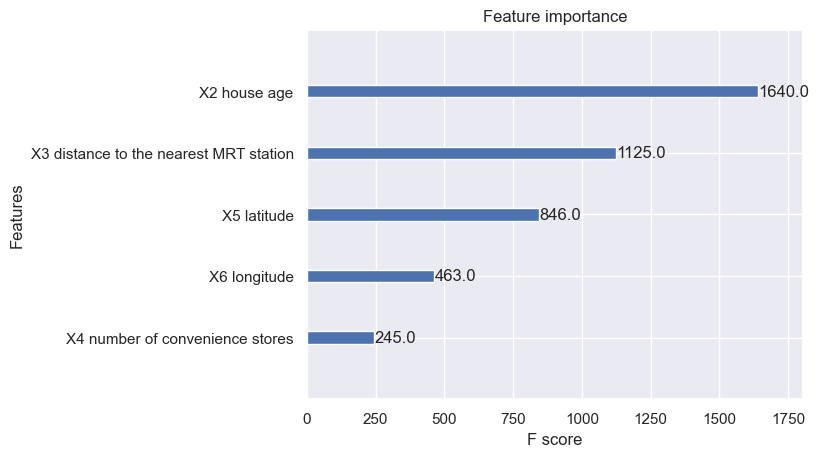

<Figure size 1600x1200 with 0 Axes>

In [75]:
xg.plot_importance(XGR_default)
plt.figure(figsize = (16, 12))
plt.show()

In [76]:
print(
    f"Test: r2={r2_score(y_test,XGR_default.predict(x_test)):0.2f}; RMSE={sqrt(mean_squared_error(y_test,XGR_default.predict(x_test))):0.2f}; MAE={mean_absolute_error(y_test,XGR_default.predict(x_test)):0.2f}; MAPE={mean_absolute_percentage_error(y_test,XGR_default.predict(x_test)):0.2f}"
)
print(
    f"Train: r2={r2_score(y_train,XGR_default.predict(x_train)):0.2f}; RMSE={sqrt(mean_squared_error(y_train,XGR_default.predict(x_train))):0.2f}; MAE={mean_absolute_error(y_train,XGR_default.predict(x_train)):0.2f}; MAPE={mean_absolute_percentage_error(y_train,XGR_default.predict(x_train)):0.2f}"
)
print(
    f"train-test= {(100*abs(r2_score(y_train,XGR_default.predict(x_train))-r2_score(y_test,XGR_default.predict(x_test)))/r2_score(y_train,XGR_default.predict(x_train))):0.2f}%"
)

Accuracy_XG_Default = [
    [
        "Train",
        round(r2_score(y_train, XGR_default.predict(x_train)), 2),
        round(sqrt(mean_squared_error(y_train, XGR_default.predict(x_train))), 2),
        round(mean_absolute_error(y_train, XGR_default.predict(x_train)), 2),
        round(mean_absolute_percentage_error(y_train, XGR_default.predict(x_train)), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, XGR_default.predict(x_test)), 2),
        round(sqrt(mean_squared_error(y_test, XGR_default.predict(x_test))), 2),
        round(mean_absolute_error(y_test, XGR_default.predict(x_test)), 2),
        round(mean_absolute_percentage_error(y_test, XGR_default.predict(x_test)), 2),
    ],
]
Model4 = ["Model 4", "R-squared", "RMSE", "MAE", "MAPE"]
print(tabulate(Accuracy_XG_Default, headers=Model4, tablefmt="fancy_grid"))

Test: r2=0.68; RMSE=7.31; MAE=5.81; MAPE=0.21
Train: r2=0.75; RMSE=6.52; MAE=5.00; MAPE=0.17
train-test= 9.50%
╒═══════════╤═════════════╤════════╤═══════╤════════╕
│ Model 4   │   R-squared │   RMSE │   MAE │   MAPE │
╞═══════════╪═════════════╪════════╪═══════╪════════╡
│ Train     │        0.75 │   6.52 │  5    │   0.17 │
├───────────┼─────────────┼────────┼───────┼────────┤
│ Test      │        0.68 │   7.31 │  5.81 │   0.21 │
╘═══════════╧═════════════╧════════╧═══════╧════════╛


### 5.4 XGboost with cross-validation using GridsearchCV

Same as default XGboost, we keep learning_rate 0.01 to get a more stable and reliable training.

We also do 3-fold cross-validation.

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "learning_rate": [0.01],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5],
    "reg_alpha": [0.1, 1.0, 10.0],
    "reg_lambda": [0.1, 1.0, 10.0],
}

xgb = xg.XGBRegressor(objective="reg:squarederror", seed=42, booster="gbtree") #default booster

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
)
grid_result = grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)
print("Best Score (RMSE): ", np.sqrt(-grid_result.best_score_))

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best Parameters:  {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 1.0}
Best Score (RMSE):  6.877715882013359


In [48]:
grid_result.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500,
 'reg_alpha': 0.1,
 'reg_lambda': 1.0,
 'subsample': 1.0}

RMSE from grid_result.best_score_:
* This RMSE is calculated during the grid search cross-validation process. It represents the average RMSE across all folds of cross-validation using the training data. 
* It is a metric used to compare different sets of hyperparameters during the search process.

In [77]:
XGR_CV = xg.XGBRegressor(
    objective="reg:squarederror", seed=42, **grid_result.best_params_
)

XGR_CV.fit(x_train, y_train)
y_pred = XGR_CV.predict(x_test)

In [78]:
print(
    f"Test: r2={r2_score(y_test,XGR_CV.predict(x_test)):0.2f}; RMSE={sqrt(mean_squared_error(y_test,XGR_CV.predict(x_test))):0.2f}; MAE={mean_absolute_error(y_test,XGR_CV.predict(x_test)):0.2f}; MAPE={mean_absolute_percentage_error(y_test,XGR_CV.predict(x_test)):0.2f}"
)
print(
    f"Train: r2={r2_score(y_train,XGR_CV.predict(x_train)):0.2f}; RMSE={sqrt(mean_squared_error(y_train,XGR_CV.predict(x_train))):0.2f}; MAE={mean_absolute_error(y_train,XGR_CV.predict(x_train)):0.2f}; MAPE={mean_absolute_percentage_error(y_train,XGR_CV.predict(x_train)):0.2f}"
)
print(
    f"train-test= {(100*abs(r2_score(y_train,XGR_CV.predict(x_train))-r2_score(y_test,XGR_CV.predict(x_test)))/r2_score(y_train,XGR_CV.predict(x_train))):0.2f}%"
)

data11 = [
    [
        "Train",
        round(r2_score(y_train, XGR_CV.predict(x_train)), 2),
        round(sqrt(mean_squared_error(y_train, XGR_CV.predict(x_train))), 2),
        round(mean_absolute_error(y_train, XGR_CV.predict(x_train)), 2),
        round(mean_absolute_percentage_error(y_train, XGR_CV.predict(x_train)), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, XGR_CV.predict(x_test)), 2),
        round(sqrt(mean_squared_error(y_test, XGR_CV.predict(x_test))), 2),
        round(mean_absolute_error(y_test, XGR_CV.predict(x_test)), 2),
        round(mean_absolute_percentage_error(y_test, XGR_CV.predict(x_test)), 2),
    ],
]

Model5 = ["Model 5", "R-squared", "RMSE", "MAE", "MAPE"]
print(tabulate(data11, headers=Model5, tablefmt="fancy_grid"))

Test: r2=0.82; RMSE=5.51; MAE=3.79; MAPE=0.12
Train: r2=0.87; RMSE=4.80; MAE=3.60; MAPE=0.11
train-test= 5.44%
╒═══════════╤═════════════╤════════╤═══════╤════════╕
│ Model 5   │   R-squared │   RMSE │   MAE │   MAPE │
╞═══════════╪═════════════╪════════╪═══════╪════════╡
│ Train     │        0.87 │   4.8  │  3.6  │   0.11 │
├───────────┼─────────────┼────────┼───────┼────────┤
│ Test      │        0.82 │   5.51 │  3.79 │   0.12 │
╘═══════════╧═════════════╧════════╧═══════╧════════╛


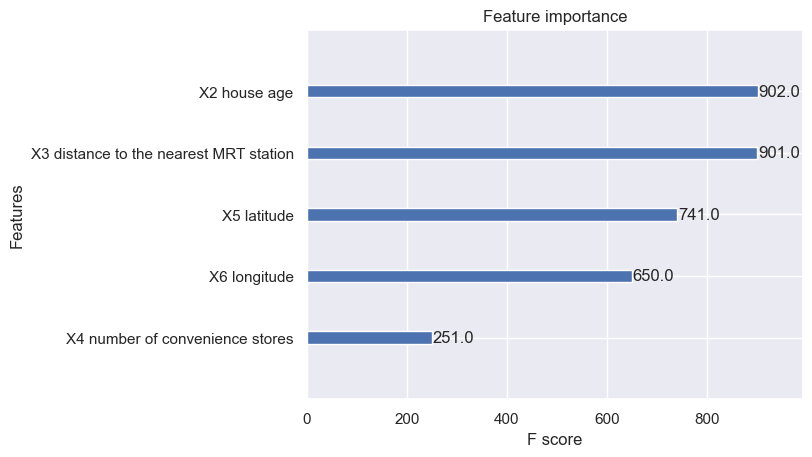

<Figure size 1600x1200 with 0 Axes>

In [79]:
xg.plot_importance(XGR_CV)
plt.figure(figsize = (16, 12))
plt.show()

### 5.5 Evaluate the all models

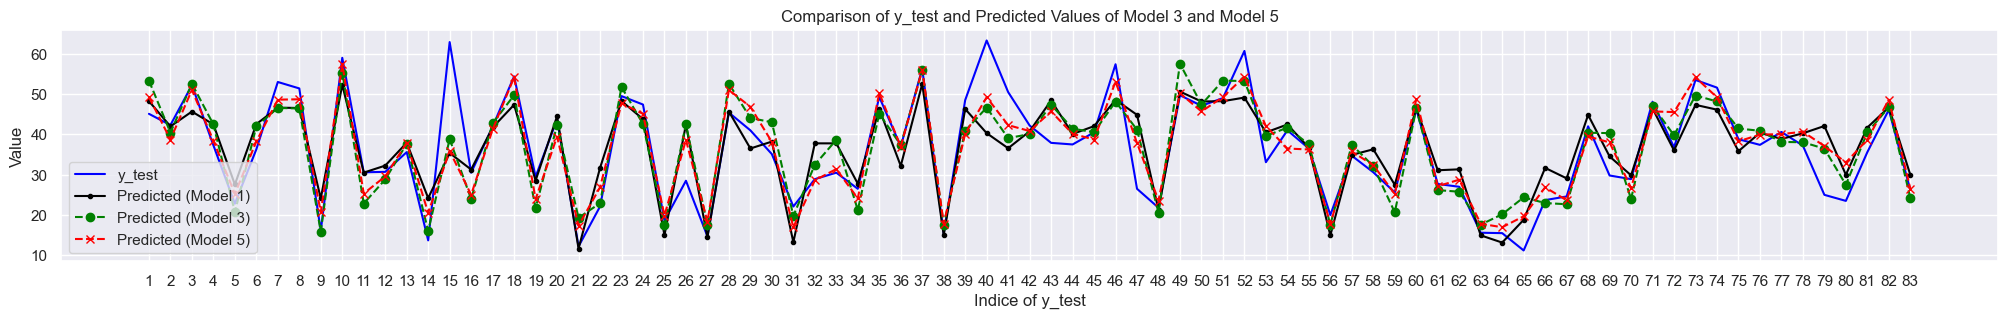

In [90]:
indices = range(1, len(y_test) + 1)

plt.figure(figsize=(25, 3))

plt.plot(indices, y_test,  linestyle='-', color='blue', label='y_test')
plt.plot(indices, SLR.predict(x_test), marker='.', linestyle='-', color='black', label='Predicted (Model 1)')
plt.plot(indices, PLR.predict(poly_features.transform(x_test)), marker='o', linestyle='--', color='green', label='Predicted (Model 3)')
plt.plot(indices, XGR_CV.predict(x_test), marker='x', linestyle='--', color='red', label='Predicted (Model 5)')

plt.xlabel('Indice of y_test')
plt.ylabel('Value')
plt.title('Comparison of y_test and Predicted Values of Model 3 and Model 5')
plt.xticks(indices)
plt.legend()
plt.show()